# Exploratory Data Analysis

Here we are exploring the data to understand it better and to establish the statistical properties of the data.

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\Data//customer_booking.csv", encoding ="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


# Make a new feature

We want to establish customer behaviour in order to have a trip on holiday(weekend), so we are goinng to make a feature called
is_weekend. If the flight day is Saturday or Sunday we give is_weekend value=1, for another value, it is given a value of 0.

In [8]:
is_weekend = []
for  i in range(len(df)):
    if df['flight_day'][i]==6 or df['flight_day'][i]==7:
        is_weekend.append(1)
    else:
        is_weekend.append(0)
df['is_weekend'] = is_weekend
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


# Analyze data

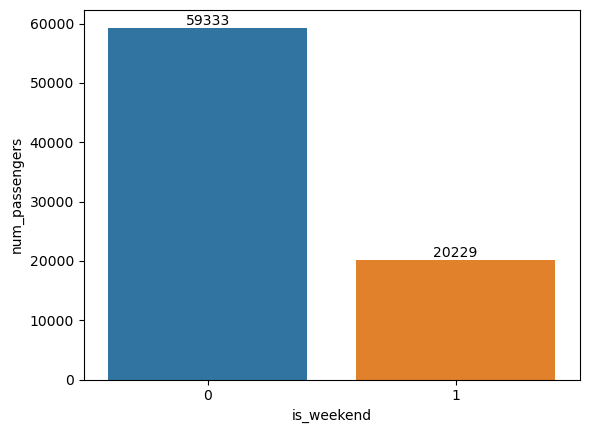

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

weekend = df.groupby('is_weekend')['num_passengers'].sum().reset_index()
ax = sns.barplot(data = weekend, x = 'is_weekend',y = 'num_passengers')
ax.bar_label(ax.containers[0])
plt.show()

What is the average number of passengers per day

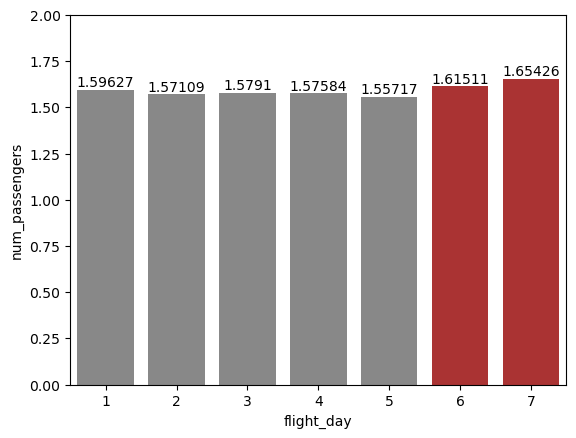

In [10]:
dayperday = df.groupby('flight_day')['num_passengers'].mean().reset_index()

ax = sns.barplot(data = dayperday, x = 'flight_day', y= 'num_passengers')
for bar in ax.patches:
    bar.set_facecolor('#888888')
    
ax.bar_label(ax.containers[0])
plt.ylim(0,2)
ax.patches[5].set_facecolor('#aa3333')
ax.patches[6].set_facecolor('#aa3333')
plt.show()

From the chart, it is evident that the number of passenger on weekends is less than the number of flights on weekdays. If you consider the average, the weekends have a higher value. 
Let us establish which routes have schedules on weekends with the most passengers.

In [11]:
route = df[df['is_weekend'] == 1].groupby('route').agg({'num_passengers' : 'sum'}).reset_index().sort_values(by='num_passengers', ascending=False)


In [12]:
route[:5]

,route,num_passengers
4,AKLKUL,1284
243,DMKKIX,462
606,PENTPE,396
375,ICNSIN,311
538,MELSGN,306


The routes above have the most passengers, we need to increase the number of flights to these 5 routes on weekends.

# Making a machine learning model

Dropping columns with many redundant features

In [13]:
df['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

It is clear route has 799 unique values, this is too large a figue and hence we delete route column

In [14]:
df.drop('route',axis = 1, inplace = True)

In [15]:
df['booking_origin'].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

Let us change the value of booking origin from name of country to name of continent.

In [16]:
conda update jupyter

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\anaconda3

  added / updated specs:
    - jupyter


The following NEW packages will be INSTALLED:

  archspec           pkgs/main/noarch::archspec-0.2.1-pyhd3eb1b0_0 
  async-lru          pkgs/main/win-64::async-lru-2.0.4-py311haa95532_0 
  brotli-python      pkgs/main/win-64::brotli-python-1.0.9-py311hd77b12b_7 
  distro             pkgs/main/win-64::distro-1.8.0-py311haa95532_0 
  gmpy2              pkgs/main/win-64::gmpy2-2.1.2-py311h7f96b67_0 
  jsonschema-specif~ pkgs/main/win-64::jsonschema-specifications-2023.7.1-py311haa95532_0 
  jupyter-lsp        pkgs/main/win-64::jupyter-lsp-2.2.0-py311haa95532_0 
  jupyter_server_te~ pkgs/main/win-64::jupyter_server_terminals-0.4.4-py311haa95532_1 
  mpc                pkgs/main/win-64::mpc-1.1.0-h7edee0f_1 
  mpfr               pkgs/main/win-64::mpfr-4.0.2-h62dcd97_1 
  mpir               pkgs/main/win-64::mpir-3.0.0-hec2e145_1 
  overrides


EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\anaconda3




In [17]:
pip install -U jupyter

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install pycountry

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pycountry_convert as pc

continent = []
index = []

df['booking_origin'] = df['booking_origin'].replace('Myanmar (Burma)', 'Myanmar')

for i in range(len(df)):
    country = df['booking_origin'][i]
    
    try:
        coutry_code = pc.country_name_to_country_alpha2(country, cn_name_format = "default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        continent.append(continent_name)
    except:
        continent.append('Others')
        
df['booking_continent'] = continent




ModuleNotFoundError: No module named 'pycountry_convert'

In [ ]:
df['booking_continent'].value_counts()